In [1]:
import pandas as pd
import tweepy 
from tweepy import OAuthHandler

In [2]:
def TwitterClient(): 
    # keys and tokens from the Twitter Dev Console 
    api_key = "xQGrEytN0KSsEERUlbA3Mwjdv"
    api_secret = "N7ModRAyQqtFkB4jvI1o0nCooyfSGfZZUAaIfHTQp3iiUGutKi"
    access = "3118781631-GnQENiXAMouhIuhas2ol14A4b9zyChTR927WZmW"
    access_secret = "frEmYjSFnETQka3sOtTb2x6oCOAkFHDmSivcgrqULytRL"

    # attempt authentication 
    try: 
        # create OAuthHandler object 
        auth = OAuthHandler(api_key, api_secret) 
        # set access token and secret 
        auth.set_access_token(access, access_secret) 
        # create tweepy API object to fetch tweets 
        api = tweepy.API(auth) 
    except: 
        print("Error: Authentication Failed") 

    return api #now we can make request to twitter using this api

In [3]:
api = TwitterClient()

#get tweets from a user and add the tweets to a dataframe
def get_tweets(user_name):
    tweets = []
    for tweet in tweepy.Cursor(api.user_timeline, id=user_name).items():
        tweets.append(tweet)
    df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
    return df

In [4]:
elon_following = api.get_friends(screen_name="elonmusk")
elon_following_names = [friend.screen_name for friend in elon_following]

In [ ]:
#get tweets from the first 5 users in elon_following_names and add them to a dataframe, each user's tweets are in a separate column
df = pd.DataFrame()
for name in elon_following_names[:5]:
    df[name] = get_tweets(name)

In [ ]:
df[elon_following_names[5]] = get_tweets(elon_following_names[5])

In [68]:
# save the dataframe to a csv file
df.to_csv("elon_tweets.csv")

In [69]:
df = pd.read_csv("elon_tweets.csv", index_col=0, parse_dates=True)
df.head()

,jgebbia,georgesoros,historydefined,neuralink,beeple,Grimezsz,thesheetztweetz,elonmusk
0,@BillyM2k @garyvee “A waffle is a pancake with...,Even as laws increasingly threaten reproductiv...,"Deer skulls with carved eyeholes dating to 11,...",Animals at Neuralink are respected and honored...,THINGS GET REAL TOMORROW. 🗣\n\nhttps://t.co/kP...,@OfficialRezz @TessaPaisa I will write the son...,(Corrected tweet for my lack of knowing what d...,"@bevedoni If that’s true, it would make me ver..."
1,@Jason @chesaboudin 😂,"Working across the United States, the new coho...",Wax mannequins melting during a 1929 heatwave....,❤️‍🔥 https://t.co/4ilaOhHPFX,HUMBLED https://t.co/KTgNQS5uyV,@OfficialRezz @TessaPaisa Fk yessss,Just under two years since launching SpaceX's ...,@CathieDWood Passive/index investment is simpl...
2,Well done team https://t.co/rB1UYRHtIu,To help countries procure more COVID-19 vaccin...,This is a photo of the vibrantly colored ceili...,We’re more vertically integrated than you'd th...,‘THE DAY I MISSED MY EVERYDAY’\n\nBeeple Creat...,@OfficialRezz @TessaPaisa Release this !,@thechrisweaver Sigh...thanks.,Interesting. I wonder if those funding these o...
3,@elonmusk They couldn’t compete with the disco...,RT @OpenSociety: Russia’s war in Ukraine “brea...,Why Was 536 One of the Worst Years to be Alive...,Our electrodes are *way* too tiny for a surgeo...,THE LAST LAUGH https://t.co/E6wGh452qV,@OfficialRezz @TessaPaisa Omg,RT @Commercial_Crew: STACKED: @BoeingSpace's #...,I dunno … seems kinda fungible
4,@km Raines Law Room for drinks,Russia must be held accountable for the horrif...,Plague Fort is a fortress on an artificial isl...,We're scaling our first implant product for cl...,@Maxs_Quest nope.,@anchormuse @lexfridman @daoudaleonard D what’...,RT @NASASpaceflight: Stratolaunch's Roc has la...,@slashdot Slashdot has some of the best comments


In [72]:
import re
from nltk.corpus import stopwords
# Remove punctuation
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

# convert to lower case
def lower_case(text):
    return text.lower()

# remove stop words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["https", "co", "http", "'", "rt", "nan"])
    word_tokens = text.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return filtered_sentence

# apply the functions to the each column and create a new dataframe with the results
df_clean = pd.DataFrame()
for name in elon_following_names[:6]:
    #convert 
    df_clean[name] = df[name].apply(remove_punctuation)
    df_clean[name] = df_clean[name].apply(lower_case)
    df_clean[name] = df_clean[name].apply(remove_stop_words)
    
df_clean["elonmusk"] = df["elonmusk"].apply(remove_punctuation)
df_clean["elonmusk"] = df_clean["elonmusk"].apply(lower_case)
df_clean["elonmusk"] = df_clean["elonmusk"].apply(remove_stop_words)
df_clean.head()

,jgebbia,georgesoros,historydefined,neuralink,beeple,Grimezsz,elonmusk
0,"[billym, k, garyvee, waffle, pancake, syrup, t...","[even, laws, increasingly, threaten, reproduct...","[deer, skulls, carved, eyeholes, dating, years...","[animals, neuralink, respected, honored, team,...","[things, get, real, tomorrow, kpxbcqdiit]","[officialrezz, tessapaisa, write, song, centur...","[bevedoni, true, would, make, happy]"
1,"[jason, chesaboudin]","[working, across, united, states, new, cohort,...","[wax, mannequins, melting, heatwave, xwataxeo]",[ilaohhpfx],"[humbled, ktgnqs, uyv]","[officialrezz, tessapaisa, fk, yessss]","[cathiedwood, passive, index, investment, simp..."
2,"[well, done, team, rb, uyrhtiu]","[help, countries, procure, covid, vaccine, dos...","[photo, vibrantly, colored, ceiling, years, ol...","[vertically, integrated, think, bc, often, ven...","[day, missed, everyday, beeple, creates, unvei...","[officialrezz, tessapaisa, release]","[interesting, wonder, funding, organizations, ..."
3,"[elonmusk, compete, discount, masons]","[opensociety, russia, war, ukraine, breaks, ru...","[one, worst, years, alive, zdi, qbjecv]","[electrodes, way, tiny, surgeon, manipulate, m...","[last, laugh, e, wgh, qv]","[officialrezz, tessapaisa, omg]","[dunno, seems, kinda, fungible]"
4,"[km, raines, law, room, drinks]","[russia, must, held, accountable, horrific, sl...","[plague, fort, fortress, artificial, island, n...","[scaling, first, implant, product, clinical, t...","[maxs, quest, nope]","[anchormuse, lexfridman, daoudaleonard, offici...","[slashdot, slashdot, best, comments]"


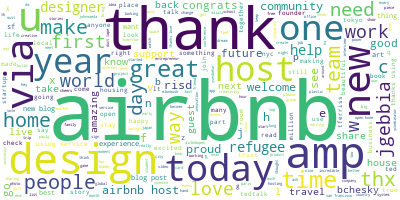

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different cleaned tweets of jeff bezos into one big string
jgebbia_string = " ".join([str(word) for item in df_clean["jgebbia"] for word in item])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(jgebbia_string)

# Visualize the word cloud
wordcloud.to_image()


In [73]:
df_strings = {}
for name in elon_following_names[:6]:
    # join the different cleaned tweets of each name into one big string and save it to the dictionary
    df_strings[name] = " ".join([str(word) for item in df_clean[name] for word in item])

df_strings["elonmusk"] = " ".join([str(word) for item in df_clean["elonmusk"] for word in item])

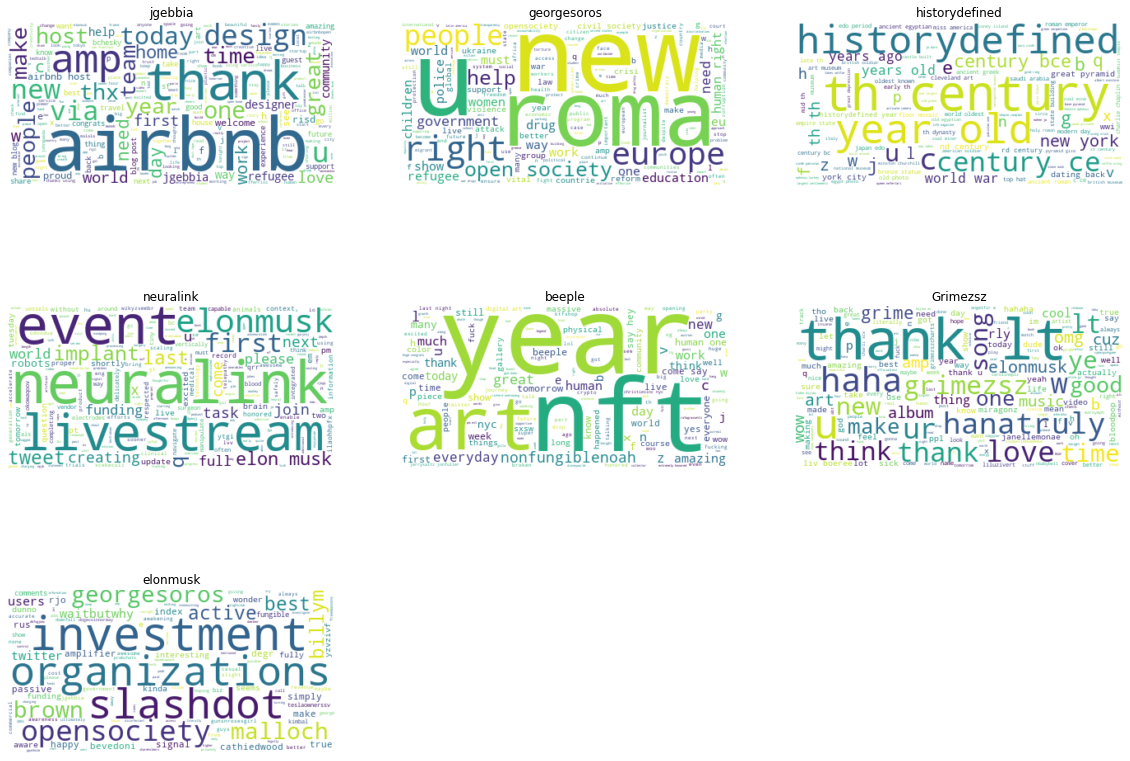

In [79]:
# create a wordcloud for each name and plot all of them in a grid
import matplotlib.pyplot as plt
users = elon_following_names[:6]
users.append("elonmusk")
plt.figure(figsize=(20,20))
for i, name in enumerate(users):
    plt.subplot(4,3,i+1)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(df_strings[name])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(name)
plt.show()


In [80]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

sentences_to_words = {}
for name in users:
    sentences_to_words[name] = list(sent_to_words(df_clean[name]))

In [81]:
import gensim.corpora as corpora

id2word_list = {}
corpus_list = {}
for name in users:
    id2word_list[name] = corpora.Dictionary(sentences_to_words[name])
    corpus_list[name] = [id2word_list[name].doc2bow(text) for text in sentences_to_words[name]]

In [82]:
from pprint import pprint
num_topics = 4
lda_model_list = {}
doc_lda_list = {}

for name in users:
    lda_model_list[name] = gensim.models.LdaMulticore(corpus=corpus_list[name],
                                                      num_topics=num_topics,
                                                      id2word=id2word_list[name])
    doc_lda_list[name] = lda_model_list[name][corpus_list[name]]

C:\Users\hasan\anaconda3\envs\DataScience\lib\site-packages\gensim\models\ldamodel.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [51]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/jgebbia/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_list["jgebbia"], corpus_list["jgebbia"], id2word_list["jgebbia"])
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/jgebbia/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.061062 -0.052801       1        1  32.064690
1     -0.076657 -0.045131       2        1  27.557481
0      0.031507  0.027899       3        1  21.272738
2     -0.015913  0.070034       4        1  19.105091, topic_info=        Term        Freq       Total Category  logprob  loglift
97    thanks  190.000000  190.000000  Default  30.0000  30.0000
82      like   47.000000   47.000000  Default  29.0000  29.0000
1241   using   35.000000   35.000000  Default  28.0000  28.0000
353      amp  113.000000  113.000000  Default  27.0000  27.0000
941      via   98.000000   98.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
163     home    8.472731   41.713024   Topic4  -6.3653   0.0613
188     love    9.202954   54.813462   Topic4  -6.2826  -0.1292
169    would    7.827980   34.308469   Topic4  -6.4444   0.1775
266       us    8.588645   56.284558   Topic4  -6.3517  -0.2248
3281     thx    8.271236   60.383873   Topic4  -6.3894  -0.3327

[332 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1703      1  0.316598  act
1703      2  0.158299  act
1703      4  0.474897  act
3770      1  0.135917   ad
3770      2  0.679583   ad
...     ...       ...  ...
1032      1  0.219764  yet
1032      2  0.109882  yet
1032      3  0.109882  yet
1032      4  0.549410  yet
2554      3  0.724048   zt

[575 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [54]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/george/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_list["georgesoros"], corpus_list["georgesoros"], id2word_list["georgesoros"])
    # create a folder ./results/george/ if it doesn't exist
    if not os.path.exists('./results/george/'):
        os.makedirs('./results/george/')
        
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/george/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.031698  0.003307       1        1  26.910847
2      0.022648 -0.079603       2        1  26.240778
1     -0.062299  0.026457       3        1  25.948969
3      0.071349  0.049839       4        1  20.899407, topic_info=             Term       Freq      Total Category  logprob  loglift
350          roma  60.000000  60.000000  Default  30.0000  30.0000
449         human  33.000000  33.000000  Default  29.0000  29.0000
164        people  54.000000  54.000000  Default  28.0000  28.0000
2219        peace   7.000000   7.000000  Default  27.0000  27.0000
266        crisis  24.000000  24.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
251      european   5.020619  18.351252   Topic4  -6.3362   0.2693
2        economic   5.163766  21.974275   Topic4  -6.3081   0.1172
979   development   5.094667  20.508170   Topic4  -6.3215   0.1728
36        society   5.859703  76.077606   Topic4  -6.1816  -0.9982
101          drug   5.065821  38.405331   Topic4  -6.3272  -0.4602

[328 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
533       1  0.229173   access
533       2  0.343760   access
533       3  0.190978   access
533       4  0.229173   access
241       4  0.483249  actions
...     ...       ...      ...
651       1  0.482238    years
651       2  0.375074    years
651       3  0.107164    years
651       4  0.053582    years
294       3  0.926686       zu

[578 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [83]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/elon/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_list["elonmusk"], corpus_list["elonmusk"], id2word_list["elonmusk"])
    # create a folder ./results/george/ if it doesn't exist
    if not os.path.exists('./results/elon/'):
        os.makedirs('./results/elon/')
        
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/elon/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\hasan\anaconda3\envs\DataScience\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.114526  0.006023       1        1  37.587473
2     -0.045476  0.083462       2        1  29.763508
3     -0.035128 -0.058279       3        1  19.781228
0     -0.033921 -0.031206       4        1  12.867791, topic_info=             Term      Freq     Total Category  logprob  loglift
42         billym  1.000000  1.000000  Default  30.0000  30.0000
20  organizations  2.000000  2.000000  Default  29.0000  29.0000
27           best  1.000000  1.000000  Default  28.0000  28.0000
29       slashdot  2.000000  2.000000  Default  27.0000  27.0000
10     investment  2.000000  2.000000  Default  26.0000  26.0000
..            ...       ...       ...      ...      ...      ...
58    georgesoros  0.100736  2.387164   Topic4  -5.1200  -1.1149
98      literally  0.098198  1.190125   Topic4  -5.1455  -0.4444
59        malloch  0.100060  2.388522   Topic4  -5.1267  -1.1222
60    opensociety  0.099955  2.384424   Topic4  -5.1278  -1.1215
20  organizations  0.098451  2.265060   Topic4  -5.1430  -1.0854

[174 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
79        2  0.906848    access
55        2  0.908635  accurate
5         1  1.073431    active
100       3  1.031226      also
87        2  0.933501       amp
...     ...       ...       ...
86        2  0.907044      want
21        2  0.906935    wonder
4         2  0.907213     would
96        2  0.934444      yeah
22        2  0.907189   yzvzivf

[90 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])